## Import Libraries

In [63]:
import requests
import geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read the boundries data of King County

In [64]:
df = geopandas.read_file(r'/home/ubuntu/ML Project/King County EDA/School_Districts_in_King_County___schdst_area.geojson')

In [65]:
Seattle_geo = df.loc[df['NAME']== 'Seattle','geometry']
VASHON_geo = df.loc[df['NAME']== 'Vashon Island','geometry']
MERCER_ISLAND_geo = df.loc[df['NAME']== 'Mercer Island','geometry']
SHORELINE_geo = df.loc[df['NAME']== 'Shoreline','geometry']

In [66]:
df1 = geopandas.read_file(r'/home/ubuntu/ML Project/King County EDA/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp')

In [67]:
df1_rev=df1.loc[df1.COUNTY=='033']

In [68]:
name_pop_zipcode_df = pd.read_csv(r'/home/ubuntu/ML Project/King County EDA/Name_Pop_ZipCode.csv')
name_pop_zipcode_df['Population']=name_pop_zipcode_df.Population.replace(',', '')
name_pop_zipcode_df['Population'] = name_pop_zipcode_df['Population'].replace(r'\.0$', '', regex=True).astype('float64')
name_pop_zipcode_df['ZipCode'] = name_pop_zipcode_df['ZipCode'].astype(str).replace(r'\.0$', '', regex=True)

In [69]:
def find_name(x):
    find_name = name_pop_zipcode_df.loc[name_pop_zipcode_df['ZipCode'] == str(x), 'City Name'].values[0]
    return find_name

In [70]:
def find_pop(x):
    find_pop = name_pop_zipcode_df.loc[name_pop_zipcode_df['ZipCode'] == str(x), 'Population'].values[0]
    return find_pop

In [ ]:
for code in name_pop_zipcode_df['ZipCode']:
    df1_rev.loc[df1_rev['ZIPCODE']== str(code), 'Name'] = find_name(code)
    df1_rev.loc[df1_rev['ZIPCODE']== str(code), 'Population'] = find_pop(code)

In [72]:
df2=df1_rev.dropna()
df2.loc[df2['Name'].isnull()]
df2.loc[df1_rev['Name']=='SEATTLE', 'geometry']=Seattle_geo.values[0]
df2.loc[df1_rev['Name']=='VASHON ISLAND', 'geometry']=VASHON_geo.values[0]
df2.loc[df1_rev['Name']=='MERCER ISLAND', 'geometry']=MERCER_ISLAND_geo.values[0]
df2.loc[df1_rev['Name']=='SHORELINE', 'geometry']=SHORELINE_geo.values[0]

In [ ]:
count_inspect_city_name = pd.read_csv(r'/home/ubuntu/ML Project/King County EDA/count_inspect_city_name.csv')
count_inspect_city_name.drop('Unnamed: 0', axis=1,inplace = True)

In [74]:
def find_num_inspection(x):
 find_inspection= np.array([0])
 find_inspection = count_inspect_city_name.loc[count_inspect_city_name['city'] == x, 'inspection_date']
 try:
      return find_inspection.values[0]
 except IndexError:
      print("Array is empty")

In [75]:
def find_num_name(x):
 find_name= np.array([0])
 find_name = count_inspect_city_name.loc[count_inspect_city_name['city'] == x, 'number_name']
 try:
      return find_name.values[0]
 except IndexError:
      print("Array is empty")

In [77]:
for name in df2['Name']:
    df2.loc[df2['Name']== str(name), 'num_inspection'] = find_num_inspection(name)
    df2.loc[df2['Name']== str(name), 'num_name'] = find_num_name(name)

In [ ]:
df2.loc[df2['Name']=='HOBART MAPLE VALLEY', ['Population','num_inspection','num_name']]
df2.loc[df2['Name']=='COVINGTON', ['Population','num_inspection','num_name']]
df2.loc[df2['Name']=='SEATTLE', ['Population','num_inspection','num_name']]

### Districts in King County

<Axes: >

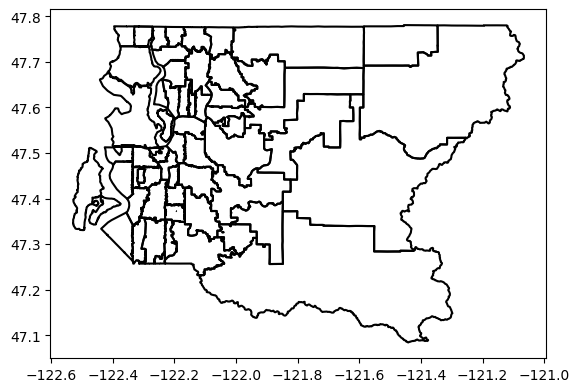

In [19]:
df2.boundary.plot(edgecolor='black')

### The Population Density of King County

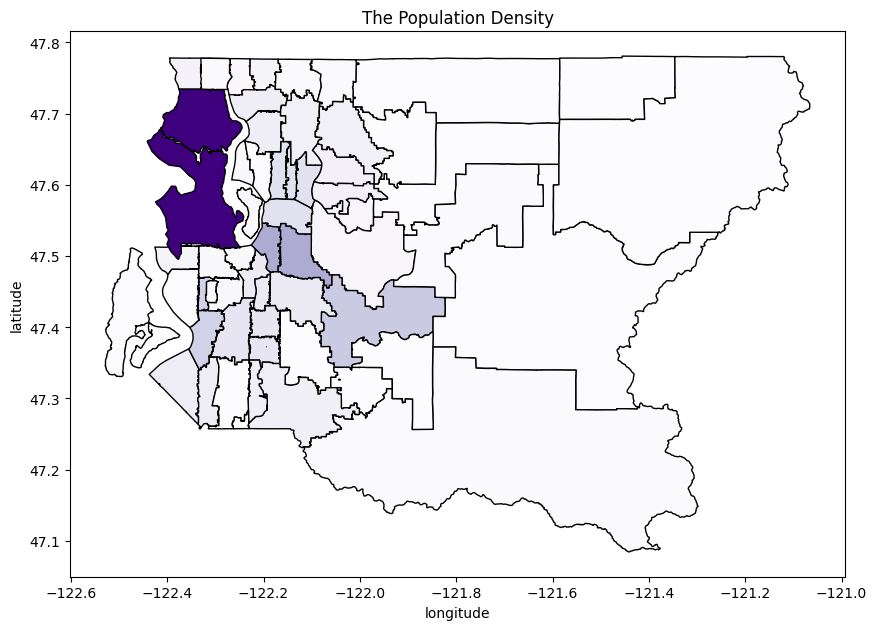

In [20]:
df2.plot(column='Population', cmap='Purples', figsize=(10,10), edgecolor='black')
plt.title('The Population Density')
plt.xlabel('longitude')
plt.ylabel('latitude')
# plt.savefig("The Population Density.png")

### Reading the counting closed business

In [21]:
one_closed_business_df = pd.read_csv('one_closed_business.csv')
two_closed_business_df = pd.read_csv('two_closed_business.csv')
three_closed_business_df = pd.read_csv('three_closed_business.csv')
four_closed_business_df = pd.read_csv('four_closed_business.csv')

### The Ratio of Inspection Frequency to Population Density

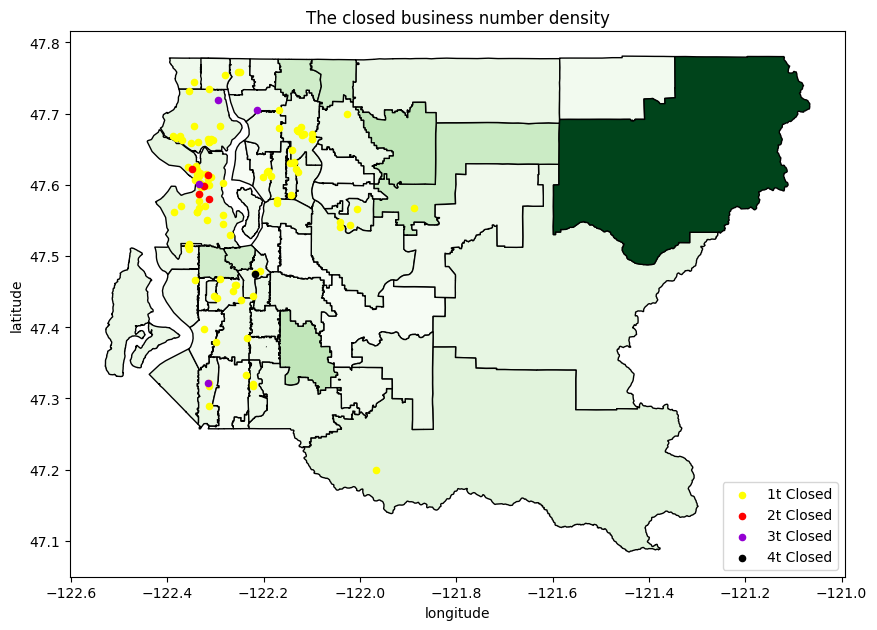

In [22]:
fig, ax = plt.subplots()
df2.plot(ax=ax, column=df2['num_inspection']/df2['Population'], cmap='Greens', figsize=(10,10), edgecolor='black')

one_closed_business_df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='yellow', figsize=(10, 10))
two_closed_business_df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='red', figsize=(10, 10))
three_closed_business_df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='#9400D3', figsize=(10, 10))
four_closed_business_df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='black', figsize=(10, 10))
plt.title('The closed business number density')
plt.legend(["1t Closed", "2t Closed", "3t Closed", "4t Closed"], loc='lower right')
# fig.savefig("The Ratio of Inspection Frequency to Population Density.png")

### The Ratio of Inspection Frequency to Restaurant Number

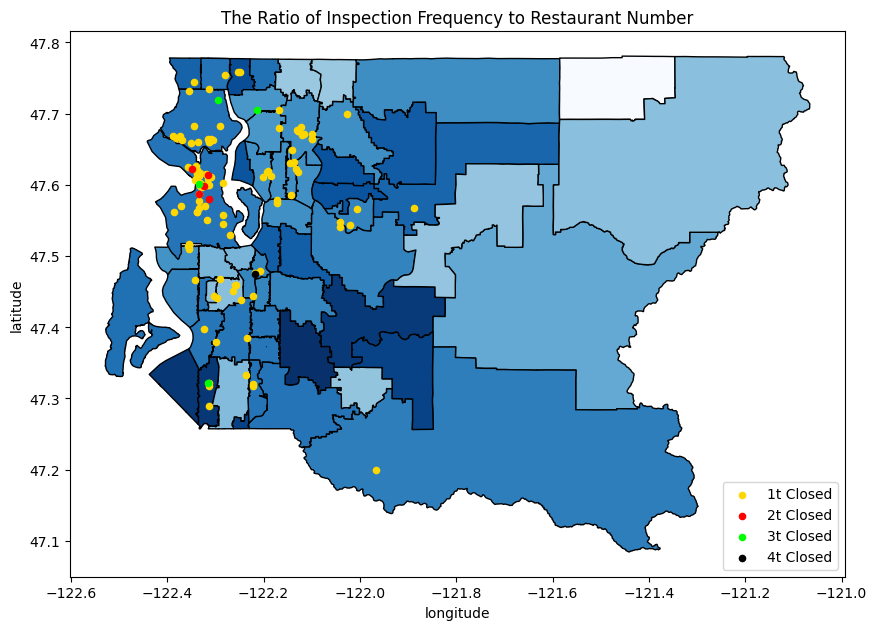

In [49]:
fig, ax = plt.subplots()
df2.plot(ax=ax, column=df2['num_inspection']/df2['num_name'], cmap='Blues', figsize=(10,10), edgecolor='black')
one_closed_business_df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='#FFD700', figsize=(10, 10))
two_closed_business_df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='#FF0000', figsize=(10, 10))
three_closed_business_df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='#00FF00', figsize=(10, 10))
four_closed_business_df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='black', figsize=(10, 10))
plt.legend(["1t Closed", "2t Closed", "3t Closed", "4t Closed"], loc='lower right')
plt.title('The Ratio of Inspection Frequency to Restaurant Number')
plt.xlabel('longitude')
plt.ylabel('latitude')
# plt.savefig("The Ratio of Inspection Frequency to Restaurant Number.png")